# 🌊 Flood Prediction - EDA

# 📚 1. Import Libraries

In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.float_format', lambda x:'%.3f' % x)
import warnings
warnings.simplefilter(action="ignore", category=Warning) # Ignore warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sb
# Configure default settings for plots
sb.set(style='ticks')
sb.set_palette('Paired')

from scipy.stats import boxcox, yeojohnson
from sklearn.preprocessing import QuantileTransformer

# 📖 2. Load Data

In [6]:
raw_data = pd.read_csv('./Data/Raw/train.csv')
raw_data.shape

(1117957, 22)

In [5]:
df = raw_data.copy()

## 2.1. Data Overview

In [7]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [8]:
df.tail()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495
1117956,1117956,4,5,6,9,5,5,2,8,4,...,4,8,6,5,5,6,7,7,8,0.560


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

🔎 **Observations:**

# ✅ 3. Sanity Check

In this sectio we'll perform:

- Check for missing values
- Check for duplicates
- Check for data types
- Check for the number of unique values of each column
- Check for statistics of data set
- Check for various categories present in the different categorical column

## 3.1. Checking for Missing Values

In [10]:
count = df.isnull().sum()[df.isnull().sum() > 0]
percentage = (count / df.shape[0]) * 100

print(count.shape[0], 'columns has missing values')
print('-'*50)
print(pd.DataFrame({'Count':count, 'Percentage %':percentage}))

0 columns has missing values
--------------------------------------------------
Empty DataFrame
Columns: [Count, Percentage %]
Index: []


In [11]:
# Checking some random records to see if there is any value which could replace null and may be missed by the above function.
df.sample(20, random_state=101)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
835320,835320,6,3,6,2,3,5,4,3,6,...,6,6,4,5,8,5,6,4,5,0.520
588824,588824,4,10,4,5,4,5,2,4,5,...,6,3,4,3,9,7,2,3,3,0.455
603449,603449,1,5,8,6,6,6,3,1,7,...,7,4,5,3,5,7,4,8,5,0.495
102794,102794,5,11,6,6,8,5,1,1,6,...,2,4,6,5,3,9,4,8,5,0.520
932803,932803,7,5,4,4,6,10,5,5,7,...,5,1,5,3,5,3,2,8,6,0.550
903125,903125,2,9,1,5,3,6,3,7,5,...,3,5,2,4,4,4,4,2,5,0.410
631352,631352,4,6,5,5,3,3,3,6,5,...,2,11,5,3,6,9,5,6,2,0.495
501088,501088,10,3,7,5,7,5,4,5,8,...,8,5,3,7,4,8,2,8,4,0.570
99725,99725,6,4,2,3,9,7,5,3,2,...,6,2,2,4,1,5,4,8,7,0.495
837236,837236,6,8,4,5,6,6,5,8,7,...,2,5,6,4,9,3,8,5,4,0.550


🔎 **Observations:** Seems there are no missing value from the dataset.

## 3.2. Checking for Duplicates

In [12]:
df.duplicated().sum()

0

**🔎 Observations:** There are no duplicate records.

## 3.3. Checking for Data Type

In [13]:
df.dtypes

id                                   int64
MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

In [15]:
features = df.columns[1:-1]
features = features.tolist()
print(features)

['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors']


In [16]:
target = 'FloodProbability'

## 3.4. Checking the number of unique values of each column

In [17]:
df.nunique()

id                                 1117957
MonsoonIntensity                        17
TopographyDrainage                      19
RiverManagement                         17
Deforestation                           18
Urbanization                            18
ClimateChange                           18
DamsQuality                             17
Siltation                               17
AgriculturalPractices                   17
Encroachments                           19
IneffectiveDisasterPreparedness         17
DrainageSystems                         18
CoastalVulnerability                    18
Landslides                              17
Watersheds                              17
DeterioratingInfrastructure             18
PopulationScore                         19
WetlandLoss                             20
InadequatePlanning                      17
PoliticalFactors                        17
FloodProbability                        83
dtype: int64

🔎 **Observations:** There is no column to be dropped off because of a single uniuque value.

## 3.5. Summary Statistics

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1117957.000,558978.000,322726.532,0.000,279489.000,558978.000,838467.000,1117956.000
MonsoonIntensity,1117957.000,4.921,2.056,0.000,3.000,5.000,6.000,16.000
TopographyDrainage,1117957.000,4.927,2.094,0.000,3.000,5.000,6.000,18.000
RiverManagement,1117957.000,4.955,2.072,0.000,4.000,5.000,6.000,16.000
Deforestation,1117957.000,4.942,2.052,0.000,4.000,5.000,6.000,17.000
Urbanization,1117957.000,4.943,2.083,0.000,3.000,5.000,6.000,17.000
ClimateChange,1117957.000,4.934,2.058,0.000,3.000,5.000,6.000,17.000
DamsQuality,1117957.000,4.956,2.083,0.000,4.000,5.000,6.000,16.000
Siltation,1117957.000,4.928,2.066,0.000,3.000,5.000,6.000,16.000
AgriculturalPractices,1117957.000,4.943,2.069,0.000,3.000,5.000,6.000,16.000


🔎 **Observations:**

# 📊 4. Exploratory Data Analysis (EDA) and Visualization

## 4.1. Univairate Analysis

In [20]:
def dist_plot(data, feature_list):
    # number of columns of the subplots
    n_cols = 2 
    # set the number of rows with the predefined number of columns
    n_rows = int(np.ceil(len(feature_list)/n_cols)) 

    # Create figure
    fig = plt.figure(figsize=(16, 4*n_rows))
    outer = gridspec.GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.3)

    for i in range(len(feature_list)):
        inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], 
                                                 wspace=0.1, hspace=0.1, height_ratios=(0.15, 0.85))

        ax_box = plt.Subplot(fig, inner[0])
        sb.boxplot(data=data, x=feature_list[i], color='lightblue', ax=ax_box)
        ax_box.set_xlabel('')
        fig.add_subplot(ax_box)

        mean_value = data[feature_list[i]].mean()
        median_value = data[feature_list[i]].median()
        ax_hist = plt.Subplot(fig, inner[1])
        sb.histplot(data=data, x=feature_list[i], kde=True, ax=ax_hist)
        ax_hist.axvline(mean_value, color='green', linestyle='dotted', linewidth=2, label='Mean')
        ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2, label='Median')
        # Add a legend
        ax_hist.legend(loc='lower right', fontsize=10)

        # Calculate skewness and kurtosis
        skewness = data[feature_list[i]].skew()
        kurt = data[feature_list[i]].kurt()
        if skewness < 0:
            x=0.25
        else:
            x=0.95
        # Add skewness and kurtosis as text on the histogram plot
        ax_hist.text(x, 0.85, f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}", 
                         transform=ax_hist.transAxes, verticalalignment='top', horizontalalignment='right',
                         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'),
                    fontsize=10)
        fig.add_subplot(ax_hist)

    plt.tight_layout()
    plt.show(block=False)

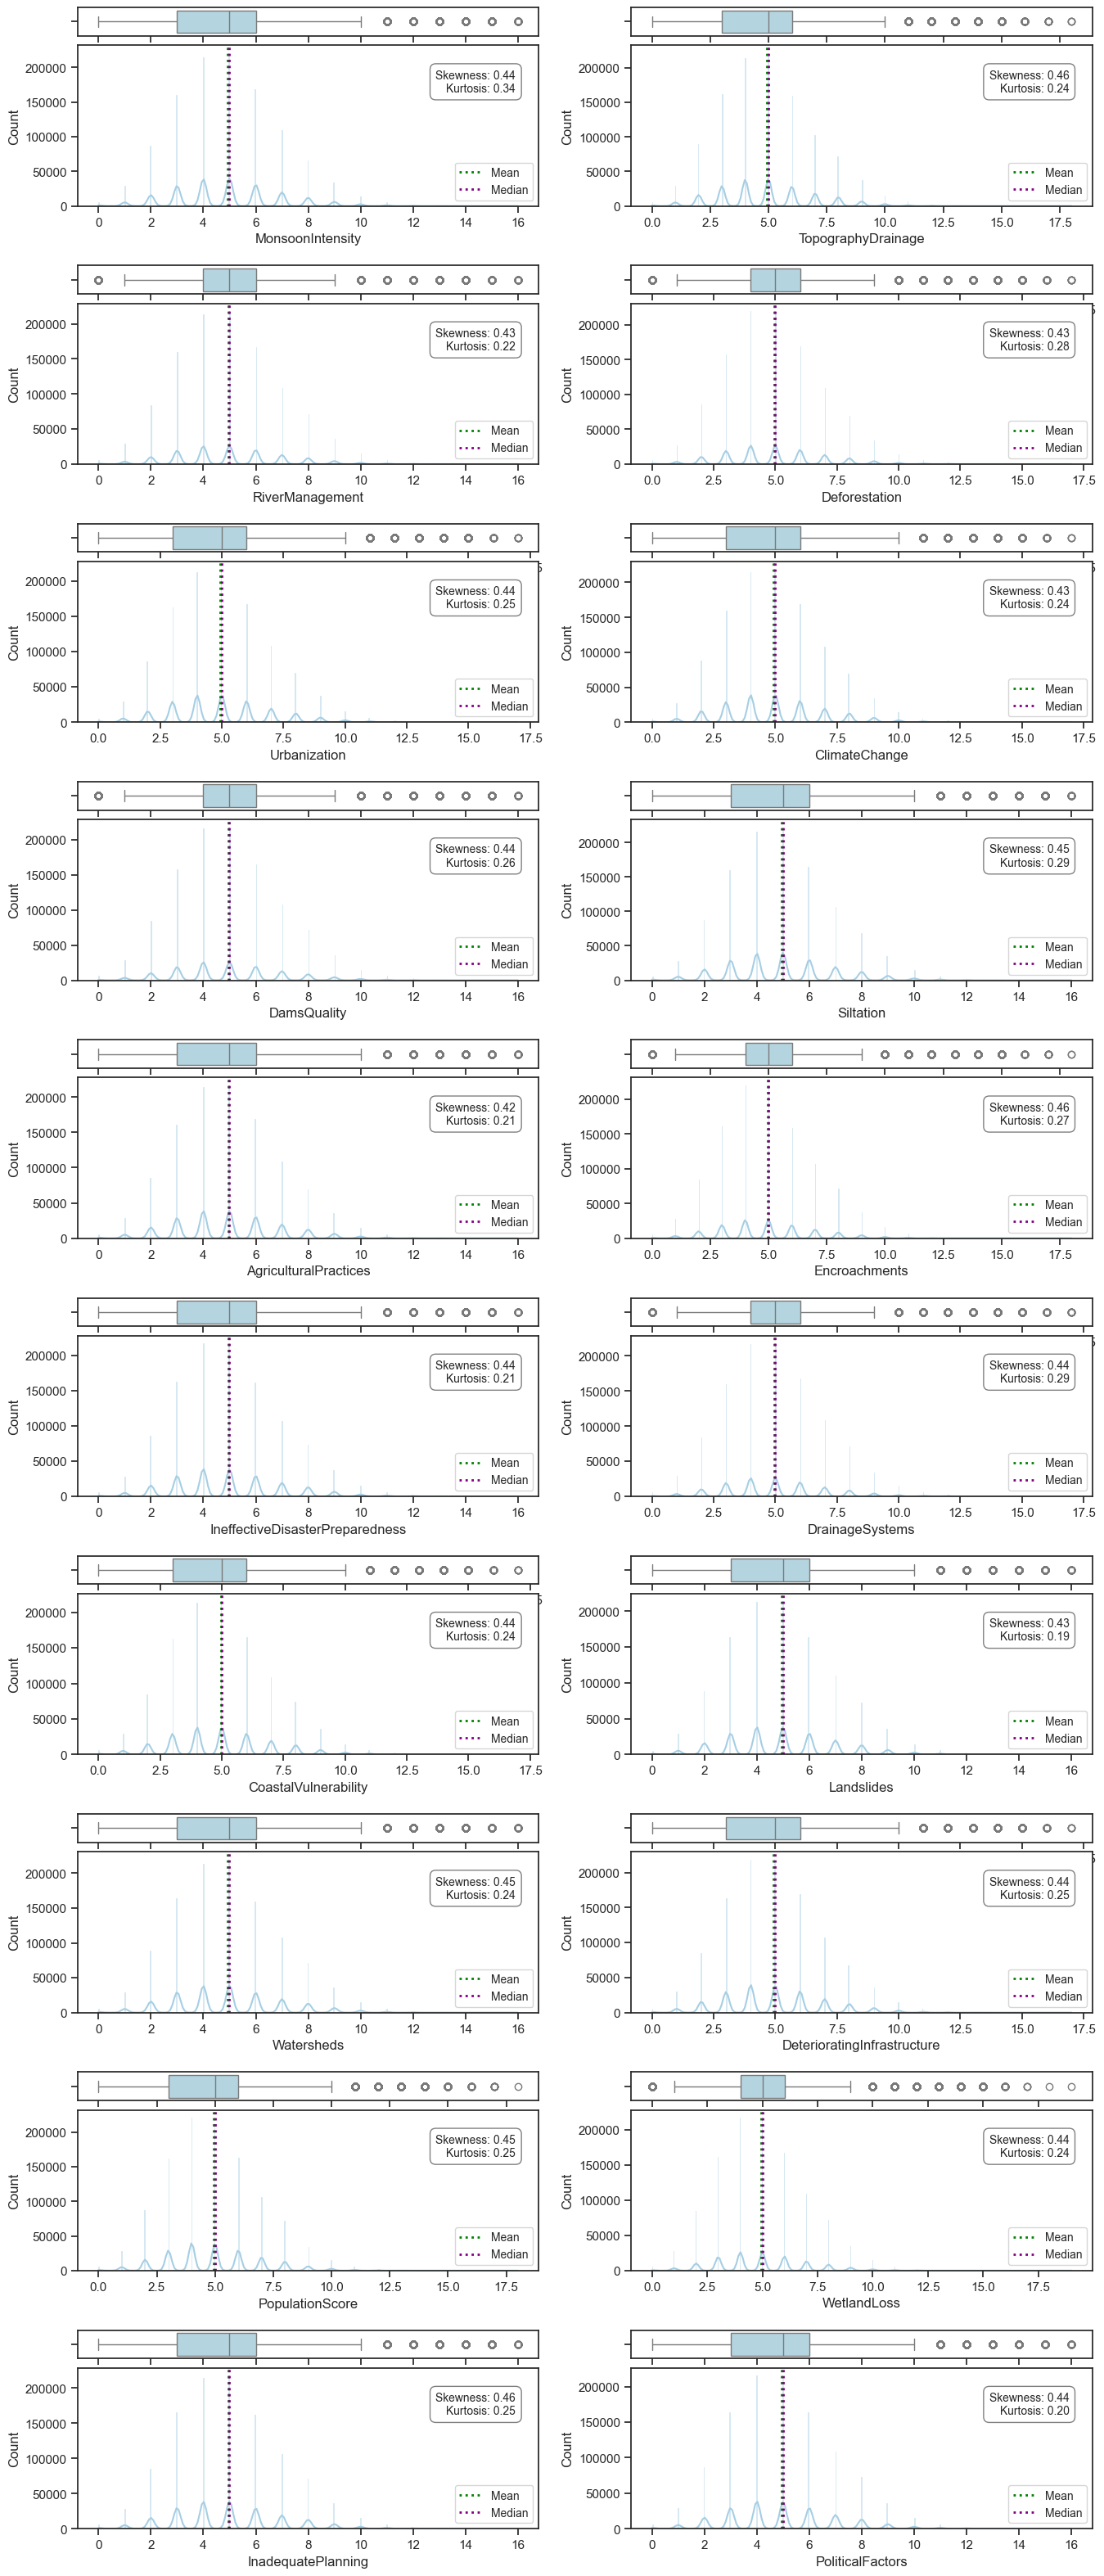

In [21]:
dist_plot(df, features)

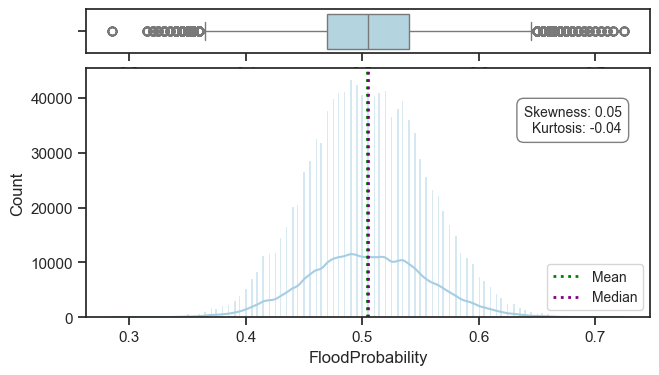

In [26]:
dist_plot(df, [target])

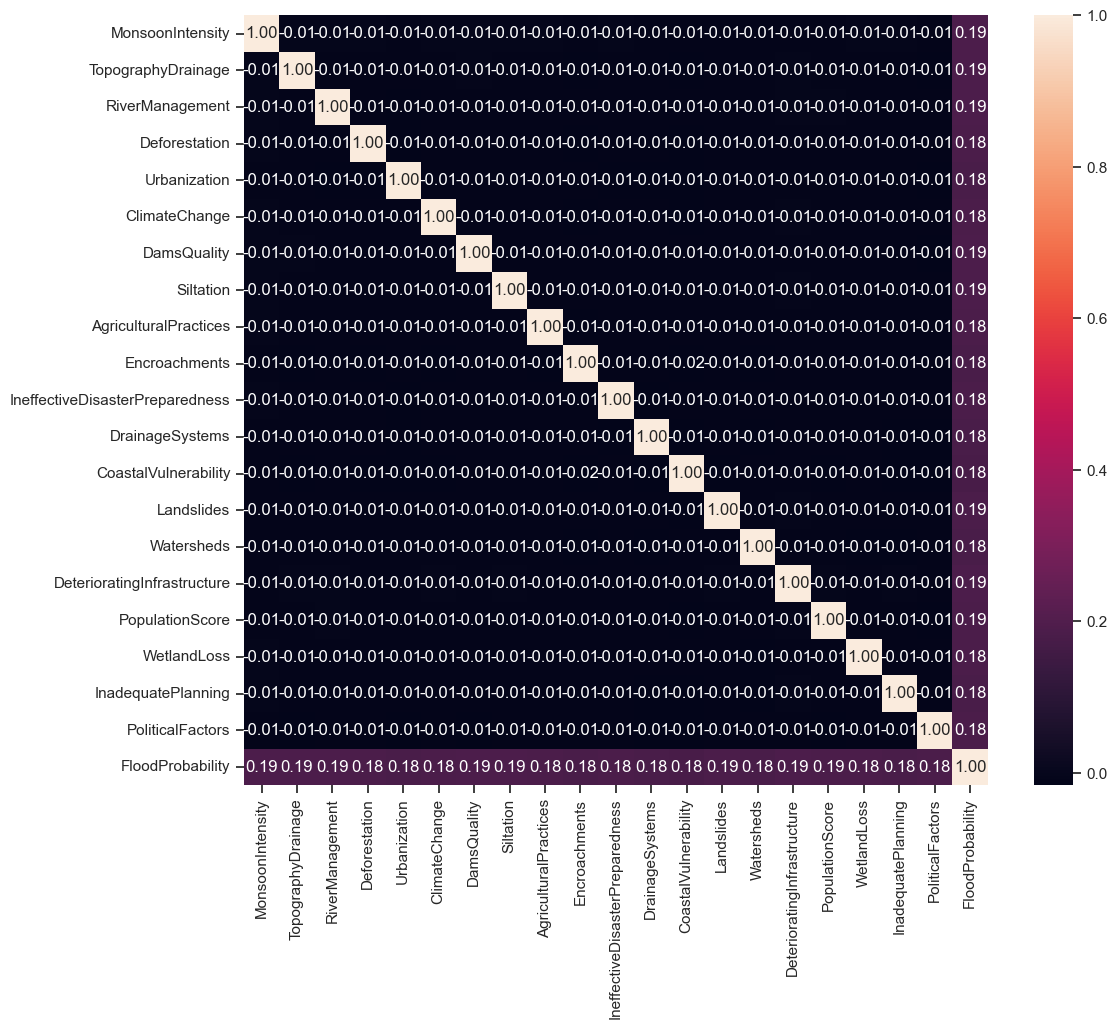

In [31]:
plt.figure(figsize=(12, 10))
sb.heatmap(df[features + [target]].corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

In [32]:
# Function to create labeled barplots for categorical features
def plot_counts(data, features, hue=None):
    
    """
    This function takes the name of the feature and plots the distribution
    of the categorical values and saves the figure for future usage using
    countplot function of seaborn.

    ---
    ### Parameters:
    - data <dataframe>: tabular data in data frame format.
    - features <list>: List of categorical columns in dataframe to be visualized.
    - hue <string>: Name of the hue.
    """
    
    # number of columns of the subplots
    n_cols = 2 
    # set the number of rows with the predefined number of columns
    n_rows = int(np.ceil(len(features)/n_cols)) 

    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for i, feature in enumerate(features):
        #bar_container = axes[i].bar(df[feature].value_counts().index, df[feature].value_counts().values)
        sb.countplot(
            data = data,
            x = feature,
            palette = 'Paired',
            hue = hue,
            ax = axes[i]
        )
        # Display count of each level of the category
        for p in axes[i].patches:
            label = p.get_height()
            x = p.get_x() + p.get_width() / 2 # Width of the plot
            y = p.get_height() # Height of the plot
            
            rotation = 0
            if hue is not None:
                rotation = 30  # Rotate annotations by 30 degrees if hue is not None

            axes[i].annotate(
                '{:.0f}'.format(label),
                (x, y),
                ha = 'center',
                va = 'center',
                size = 12,
                xytext = (0, 5),
                textcoords = 'offset points',
                rotation = rotation
            )
            
        axes[i].set(ylabel='Count', title=feature, xlabel='')
        axes[i].tick_params(axis='x', rotation=30)

    # If the number of features is odd, remove the empty subplot
    if len(features) % 2 != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()

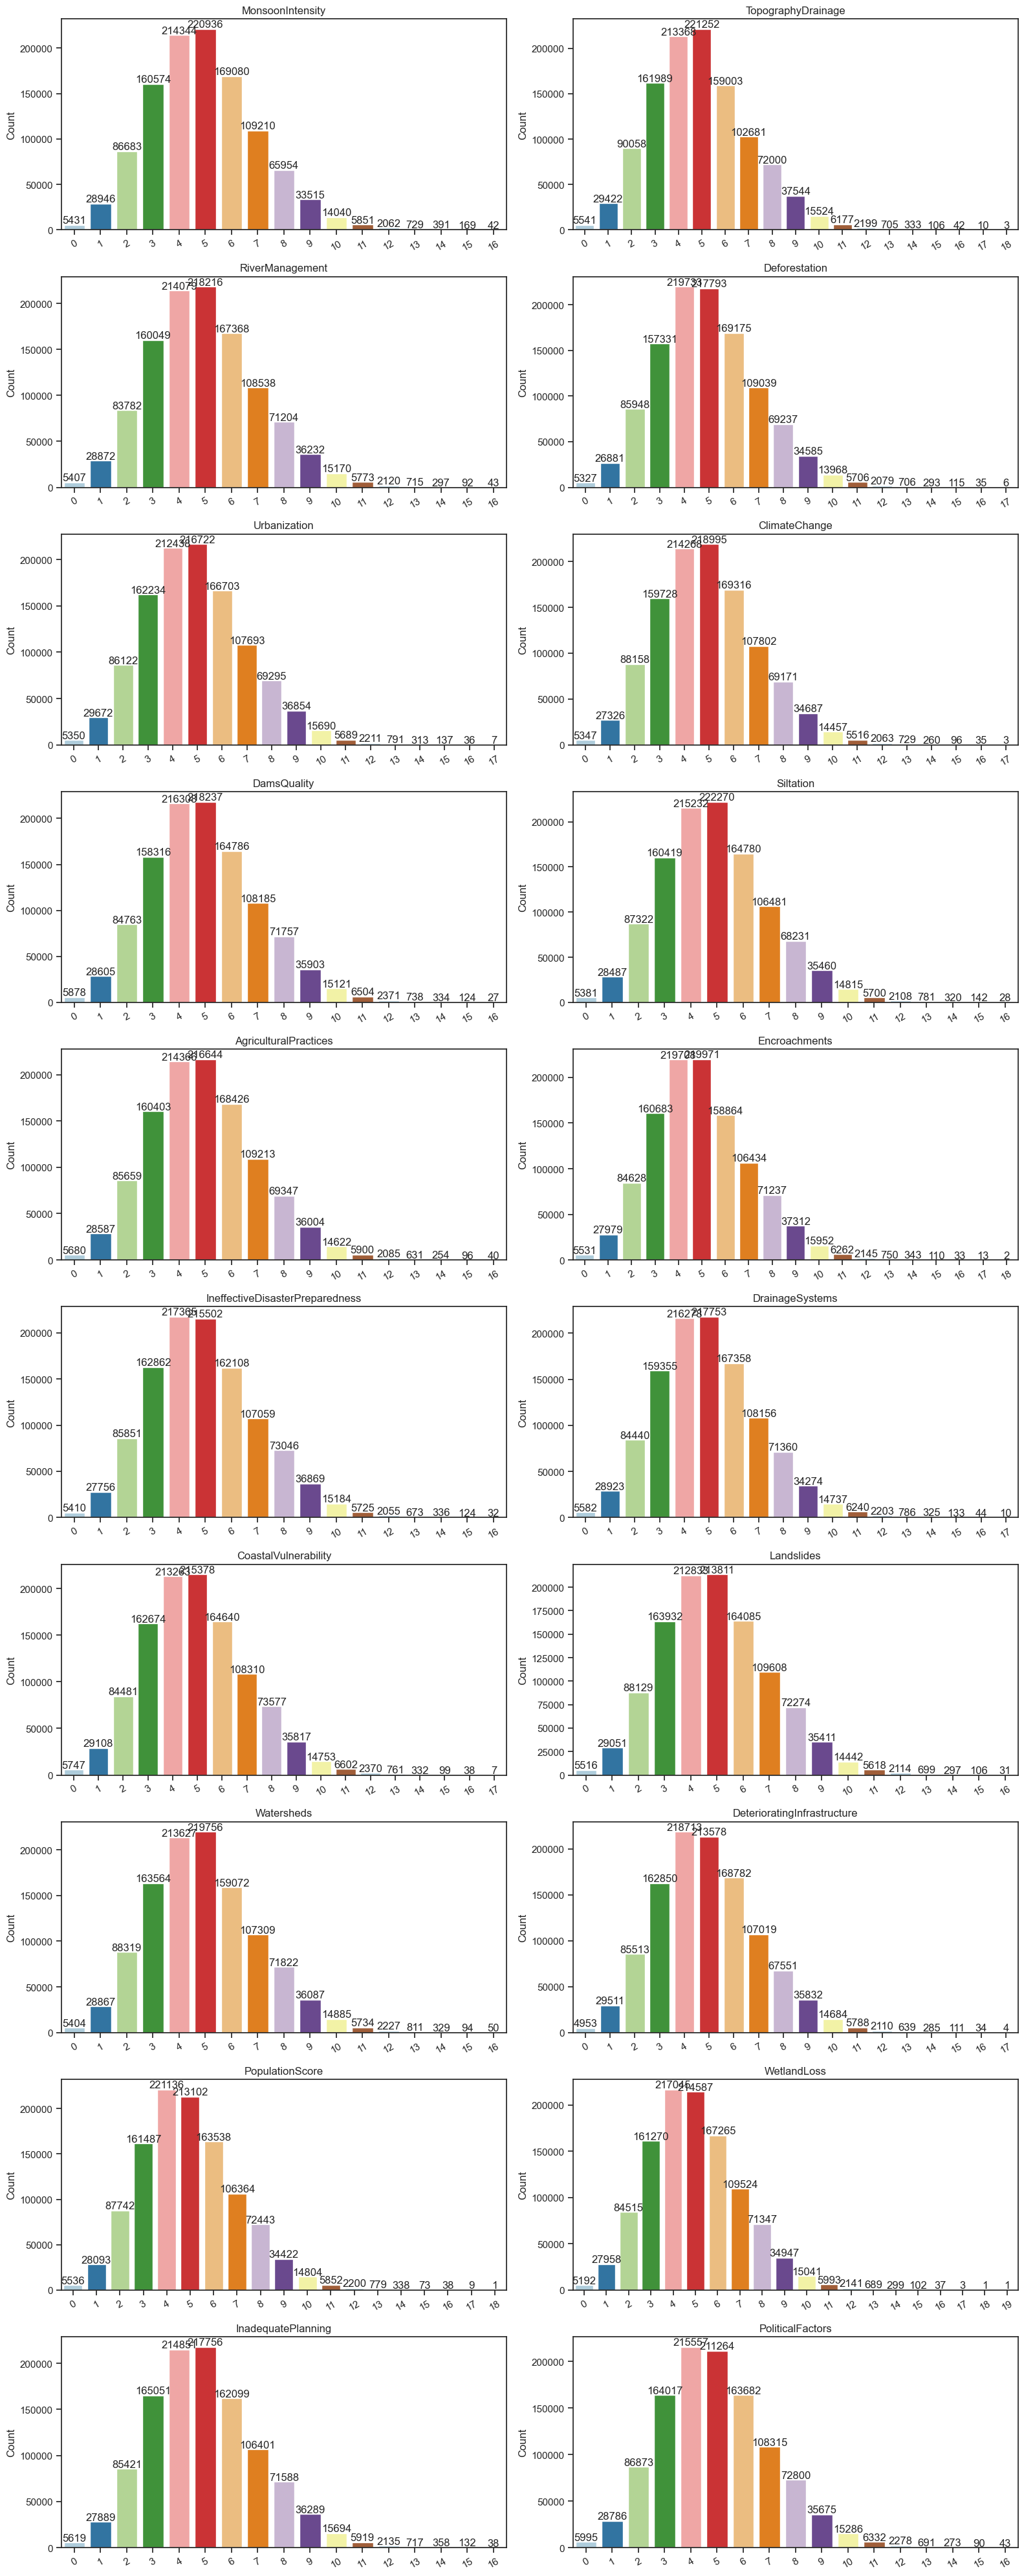

In [33]:
plot_counts(df, features)

# 🧹 5. Data Preparation
Since there is no null values in the dataset, we'll apply outlier removal only. Then, move to the data tranformation section.

## 5.1. Dropping Columns
We'll drop ID column.

In [34]:
df.drop('id', axis=1, inplace=True)

## 5.2. Handling Outliers

We'll handle the outliers using IQR method.

$IQR = Q_3 - Q_1$

Where: 

$Q_1$ is the first quartile $(25^{th} percentile)$ and 

$Q_3$ is the first quartile $(75^{th} percentile)$

Lower bound: $Q_1 - 1.5 \times IQR$

Upper bound: $Q_3 + 1.5 \times IQR$

In [35]:
# Calculate the first quartile (Q1) and third quartile (Q3) for the selected features
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)

# Calculate the interquartile range (IQR) for the selected features
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers for the selected features
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for the selected features
outliers = (df[features] < lower_bound) | (df[features] > upper_bound)

# Remove outliers for the selected features
df_no_outliers = df[~outliers.any(axis=1)]

df_no_outliers.reset_index(inplace=True, drop=True)

# Display the cleaned dataframe's info
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849100 entries, 0 to 849099
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   MonsoonIntensity                 849100 non-null  int64  
 1   TopographyDrainage               849100 non-null  int64  
 2   RiverManagement                  849100 non-null  int64  
 3   Deforestation                    849100 non-null  int64  
 4   Urbanization                     849100 non-null  int64  
 5   ClimateChange                    849100 non-null  int64  
 6   DamsQuality                      849100 non-null  int64  
 7   Siltation                        849100 non-null  int64  
 8   AgriculturalPractices            849100 non-null  int64  
 9   Encroachments                    849100 non-null  int64  
 10  IneffectiveDisasterPreparedness  849100 non-null  int64  
 11  DrainageSystems                  849100 non-null  int64  
 12  Co

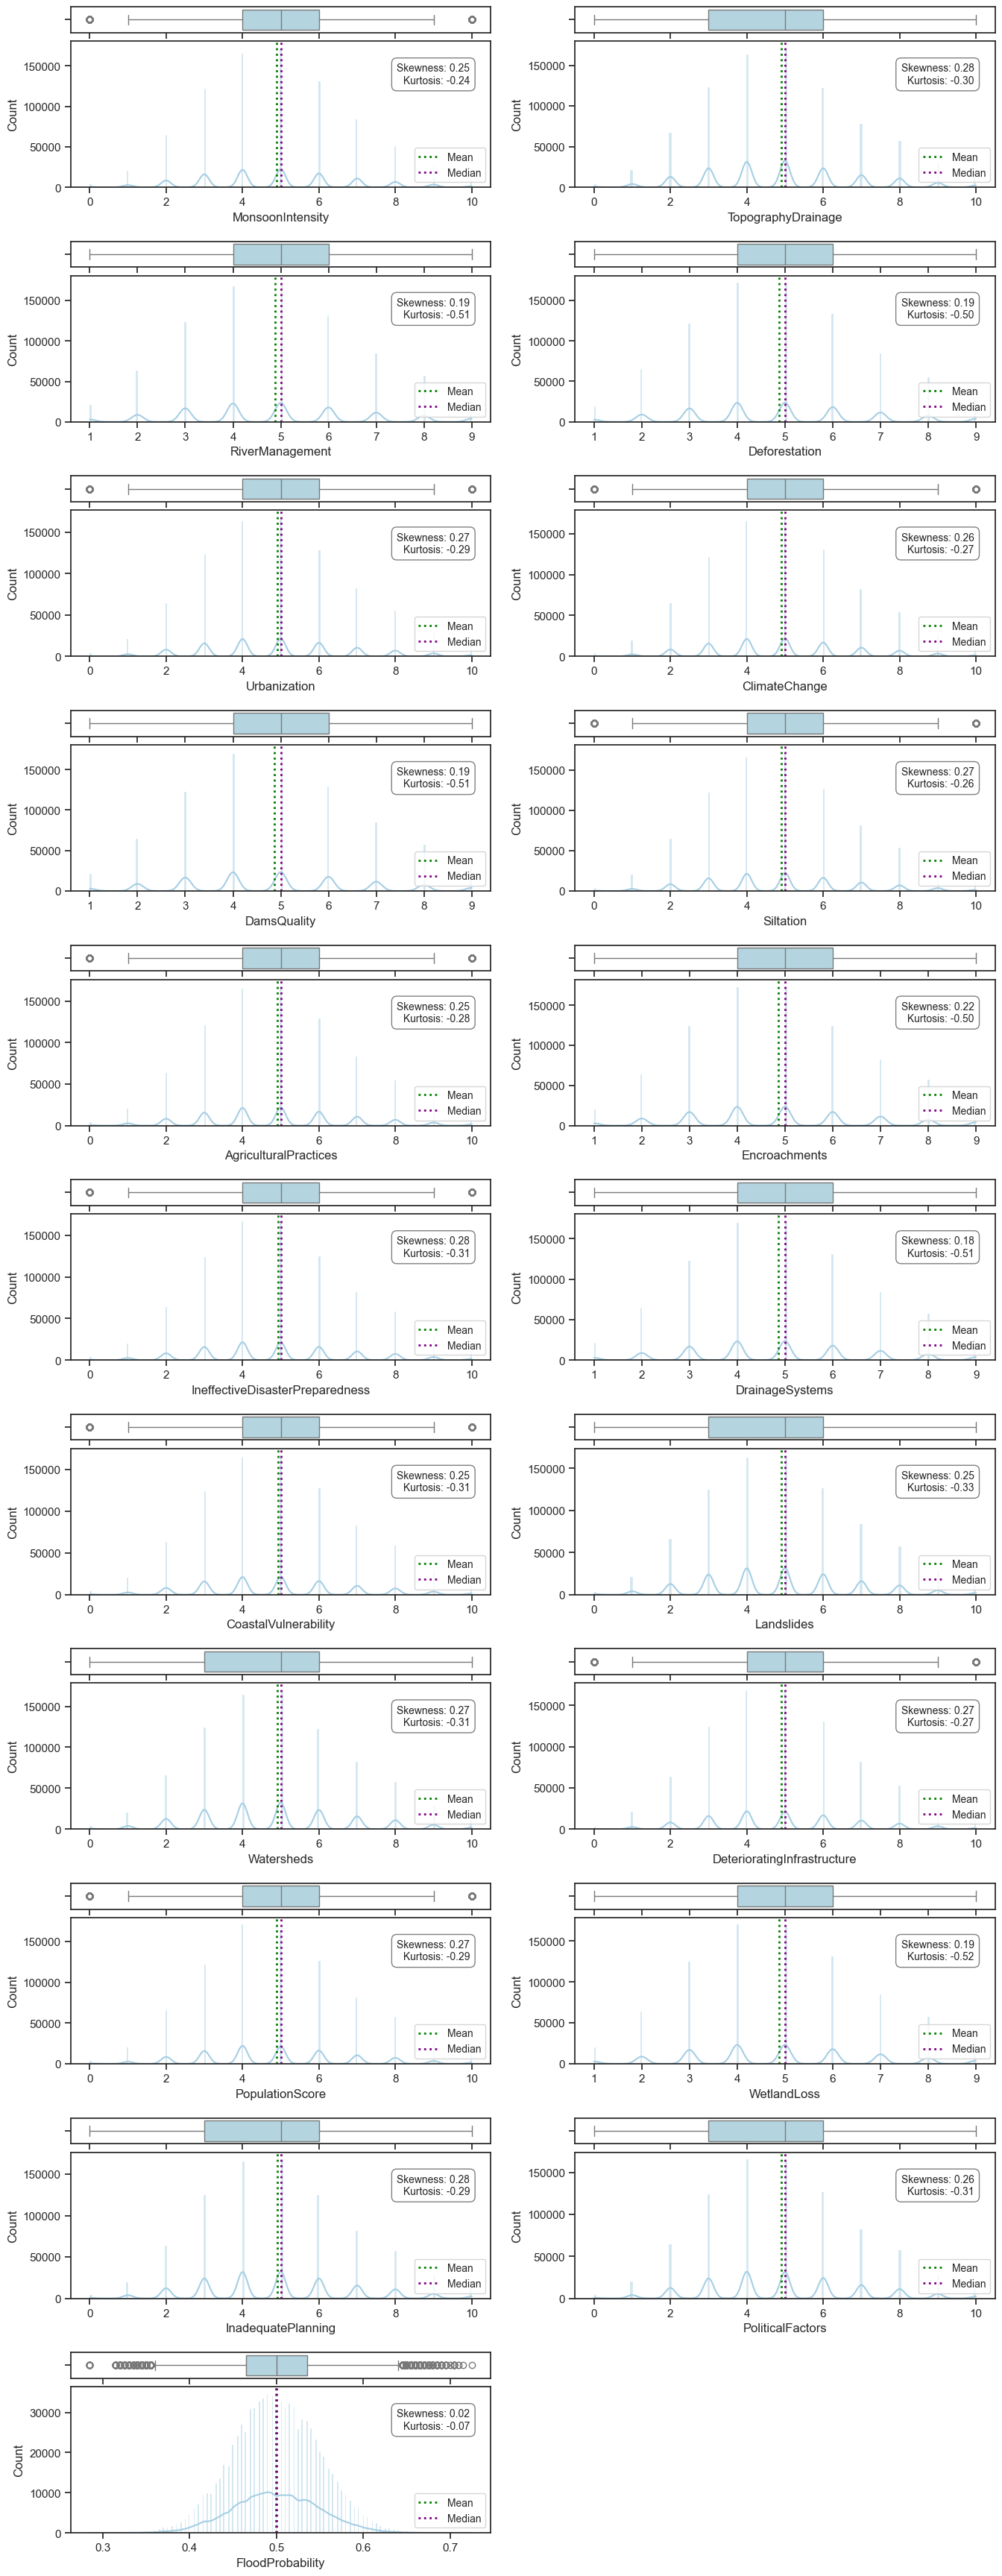

In [37]:
dist_plot(df_no_outliers, features + [target])

## 5.3. Handling Skewness of the Numeric Features

Skewed data can also affect the generalization performance of the model. If the training data contains a disproportionate number of extreme values, the model may learn patterns that are specific to the training data but do not generalize well to new, unseen data.

In [39]:
def transformation_method(data, feature):
    fig, axes = plt.subplots(2, 3, figsize=(12, 9))  # Adjusted for an additional plot

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    # Hide unused subplot axes
    for ax in axes[6:]:
        ax.axis('off')
        
    # Calculate skewness
    # Original Distribution of the feature
    sb.histplot(data[feature], kde=True, bins=30, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Original {feature} Distribution \n (Skew: {data[feature].skew():.5f})', fontsize=10)
    axes[0].set_xlabel(feature, fontsize=10)
    axes[0].set_ylabel('Frequency', fontsize=10)

    # Log Transformed feature
    # Applying Log Transformation
    data['Log_'+feature] = np.log(data[feature])
    sb.histplot(data['Log_'+feature], kde=True, bins=30, color='blue', ax=axes[1])
    axes[1].set_title(f"Log Transformed {feature} \n (Skew: {data['Log_'+feature].skew():.5f})", fontsize=10)
    axes[1].set_xlabel(f'Log of {feature}', fontsize=10)
    axes[1].set_ylabel('Frequency', fontsize=10)

    # Square Root Transformed feature
    # Applying Square Root Transformation
    data['Sqrt_'+feature] = np.sqrt(data[feature])
    sb.histplot(data['Sqrt_'+feature], kde=True, bins=30, color='orange', ax=axes[2])
    axes[2].set_title(f"Square Root Transformed {feature} \n (Skew: {data['Sqrt_'+feature].skew():.5f})", fontsize=10)
    axes[2].set_xlabel(f'Square Root of {feature}', fontsize=10)
    axes[2].set_ylabel('Frequency', fontsize=10)

    # Box-Cox Transformed feature
    # Applying Box-Cox Transformation after checking all values are positive
    if (data[feature] <= 0).any():
        # Shift the values to make them positive
        shift_value = abs(data[feature].min()) + 1
        data[feature] += shift_value
        print(f"Values of {feature} were shifted to make them positive.")
    data['BoxCox_'+feature], _ = boxcox(data[feature])
    sb.histplot(data['BoxCox_'+feature], kde=True, bins=30, color='red', ax=axes[3])
    axes[3].set_title(f"Box-Cox Transformed {feature} \n Skew: {data['BoxCox_'+feature].skew():.5f})", fontsize=10)
    axes[3].set_xlabel(f'Box-Cox of {feature}', fontsize=10)
    axes[3].set_ylabel('Frequency', fontsize=10)

    # Yeo-Johnson Transformed feature
    # Applying Yeo-Johnson Transformation
    data['YeoJohnson_'+feature], _ = yeojohnson(data[feature])
    sb.histplot(data['YeoJohnson_'+feature], kde=True, bins=30, color='purple', ax=axes[4])
    axes[4].set_title(f"Yeo-Johnson Transformed {feature} \n (Skew: {data['YeoJohnson_'+feature].skew():.5f})", fontsize=10)
    axes[4].set_xlabel(f'Yeo-Johnson of {feature}', fontsize=10)
    axes[4].set_ylabel('Frequency', fontsize=10)

    # Quantile Transformed feature (Normal Distribution)
    # Applying Quantile Transformation to follow a normal distribution
    quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
    data['Quantile_'+feature] = quantile_transformer.fit_transform(data[feature].values.reshape(-1, 1)).flatten()
    sb.histplot(data['Quantile_'+feature], kde=True, bins=30, color='green', ax=axes[5])
    axes[5].set_title(f"Quantile Transformed {feature} (Normal Distn, \n Skew: {data['Quantile_'+feature].skew():.5f})", fontsize=10)
    axes[5].set_xlabel(f'Quantile Transformed {feature}', fontsize=10)
    axes[5].set_ylabel('Frequency', fontsize=10)

    plt.tight_layout(pad=3.0)
    plt.show()

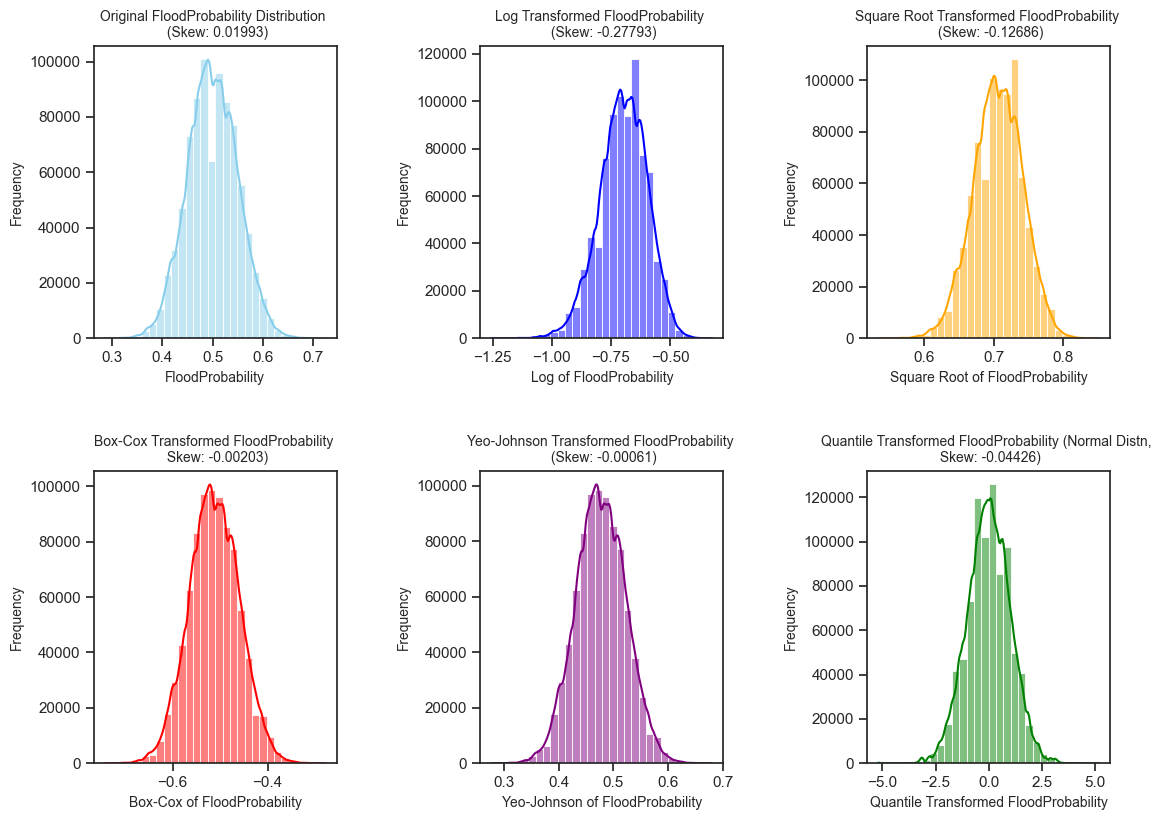

In [41]:
transformation_method(df_no_outliers, target)